In [1]:
%run bootstrap.py

In [7]:
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

In [2]:
from pathlib import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from evaluation.plotting_params import set_rc_params

In [3]:
set_rc_params()

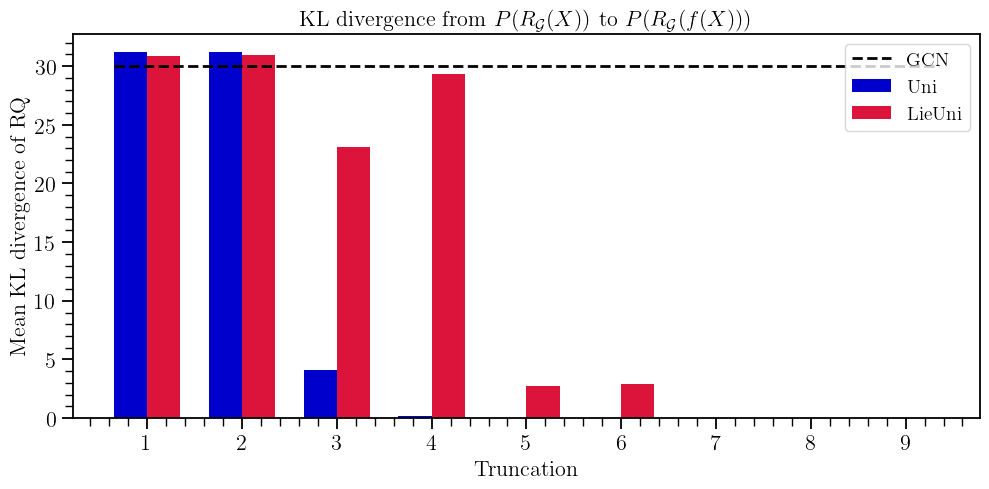

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import json
from pathlib import Path

def load_json_means(json_path):
    """Load a JSON and return truncations and mean values."""
    with open(json_path, "r") as f:
        data = json.load(f)
    truncs = sorted(data.keys(), key=int)
    means = [np.mean(data[t]) for t in truncs]
    return truncs, means

uni_json = Path("output/uni/all_rq_diffs.json")
lieuni_json = Path("output/lieuni/all_rq_diffs.json")
gcn_json = Path("output/gcn/all_rq_diffs.json")

truncations, uni_means = load_json_means(uni_json)
_, lieuni_means = load_json_means(lieuni_json)
_, gcn_means = load_json_means(gcn_json)

gcn_mean = np.mean(gcn_means) if gcn_means else 0

bar_width = 0.35
x = np.arange(len(truncations))


fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - bar_width/2, uni_means, width=bar_width, label='Uni', color='mediumblue')
ax.bar(x + bar_width/2, lieuni_means, width=bar_width, label='LieUni', color='crimson')
ax.hlines(gcn_mean, x[0] - bar_width, x[-1] + bar_width, colors='black', linestyles='dashed', linewidth=2, label='GCN')

ax.set_xlabel("Truncation")
ax.set_ylabel("Mean KL divergence of RQ")
ax.set_title(r"KL divergence from $P(R_\mathcal{G}(X))$ to $P(R_\mathcal{G}(f(X)))$")

ax.set_xticks(x)
ax.set_xticklabels([str(i) for i in range(1, 10)])

ax.legend()
plt.tight_layout()
plt.show()


In [19]:
uni_means

[np.float64(30.83892235607624),
 np.float64(30.909931313739627),
 np.float64(23.069305455775684),
 np.float64(29.30838031943939),
 np.float64(2.758201343271471),
 np.float64(2.8749899123249065),
 np.float64(0.04629485254177043),
 np.float64(0.010369036197182827),
 np.float64(0.00022361932515855775)]

In [20]:
lieuni_means

[np.float64(30.83892235607624),
 np.float64(30.909931313739627),
 np.float64(23.069305455775684),
 np.float64(29.30838031943939),
 np.float64(2.758201343271471),
 np.float64(2.8749899123249065),
 np.float64(0.04629485254177043),
 np.float64(0.010369036197182827),
 np.float64(0.00022361932515855775)]